Electricity Usage Analysis

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data_orig = pd.read_csv('electric-bill.csv')

data_orig['Start'] = pd.to_datetime(data_orig['Start']) # convert date column to DateTime
data_orig['End'] = pd.to_datetime(data_orig['End']) # convert date column to DateTime

data_orig.sort_values(by=['Start'])
data_orig['net_rate'] = round(data_orig['charged'] / data_orig['kW_used'],3)
data_orig['del_rate'] = data_orig['net_rate'] - data_orig['sup_rate']

print(data_orig.info(),'\n')
print(data_orig.describe(),'\n')
data_orig

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Start     34 non-null     datetime64[ns]
 1   End       34 non-null     datetime64[ns]
 2   kW_used   34 non-null     int64         
 3   charged   34 non-null     float64       
 4   sup_rate  34 non-null     float64       
 5   net_rate  34 non-null     float64       
 6   del_rate  34 non-null     float64       
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 2.0 KB
None 

             kW_used       charged      sup_rate   net_rate   del_rate
count      34.000000     34.000000  3.400000e+01  34.000000  34.000000
mean   178549.147059  27204.789118  7.800000e-02   0.152618   0.074618
std     28232.201305   4103.094572  2.817298e-17   0.006998   0.006998
min    135585.000000  21102.080000  7.800000e-02   0.139000   0.061000
25%    156807.000000  23269.597500  7.800000e-02   0.

,Start,End,kW_used,charged,sup_rate,net_rate,del_rate
0,2020-01-21,2020-02-20,174492,24846.45,0.078,0.142,0.064
1,2020-02-20,2020-03-19,153270,21836.03,0.078,0.142,0.064
2,2020-03-19,2020-04-21,156807,22158.87,0.078,0.141,0.063
3,2020-04-21,2020-05-20,154449,22509.09,0.078,0.146,0.068
4,2020-05-20,2020-06-19,175671,25514.22,0.078,0.145,0.067
5,2020-06-19,2020-07-22,225189,31328.66,0.078,0.139,0.061
6,2020-07-22,2020-08-20,216936,31139.58,0.078,0.144,0.066
7,2020-08-20,2020-09-21,226368,32562.87,0.078,0.144,0.066
8,2020-09-21,2020-10-21,208683,31177.54,0.078,0.149,0.071
9,2020-10-21,2020-11-19,187461,28658.88,0.078,0.153,0.075


<AxesSubplot:xlabel='Start'>

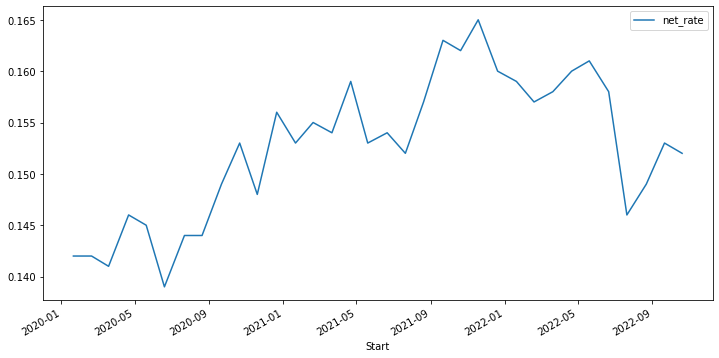

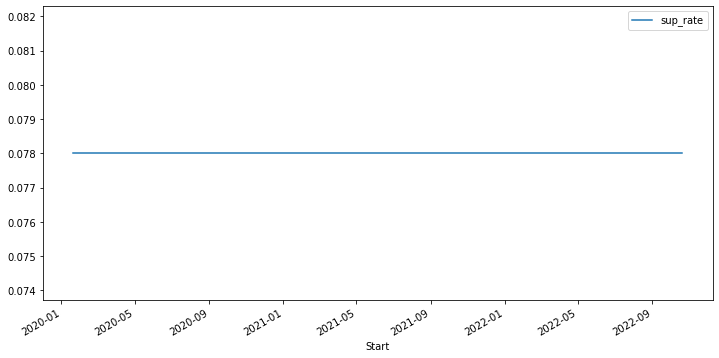

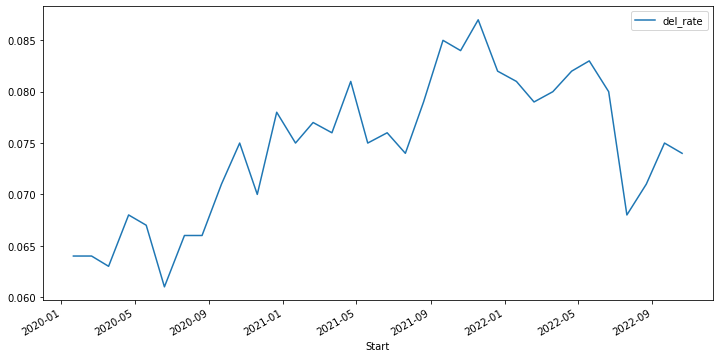

In [11]:
ax = data_orig.plot(x='Start',y='net_rate', figsize=(12,6))
data_orig.plot(x='Start',y='sup_rate', figsize=(12,6))
data_orig.plot(x='Start',y='del_rate', figsize=(12,6))

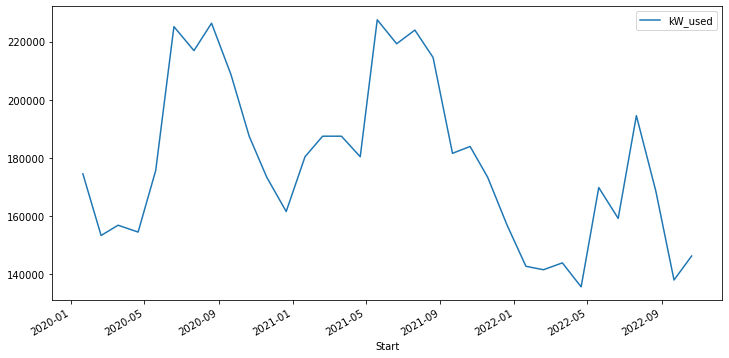

In [12]:
ax = data_orig.plot(x='Start',y='kW_used', figsize=(12,6))

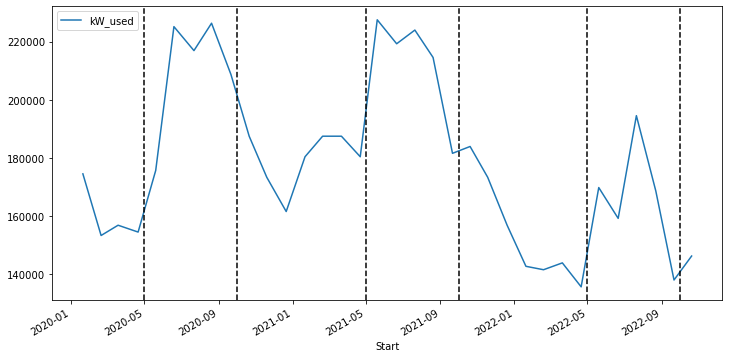

In [13]:
ax = data_orig.plot(x='Start',y='kW_used', figsize=(12,6))
xcoords = ['2020-05-01','2020-10-01','2021-05-01','2021-10-01','2022-05-01','2022-10-01']

for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

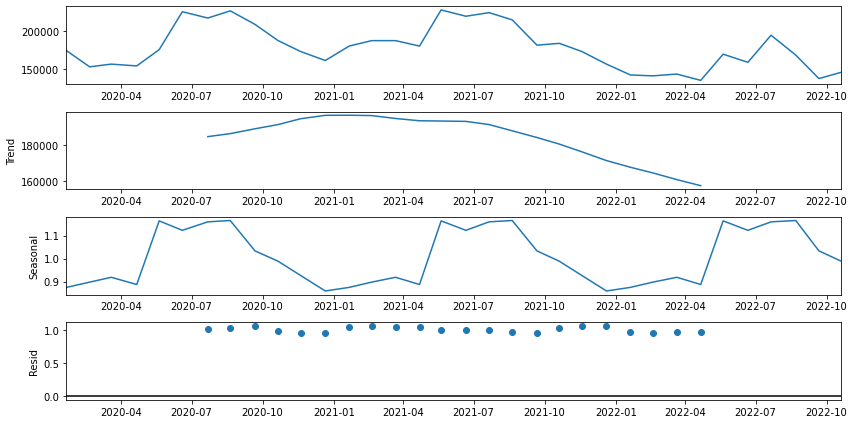

In [14]:
data_orig.set_index('Start', inplace=True)
analysis = data_orig[['kW_used']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=12)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.rc("figure", figsize=(12,6))
decompose_result_mult.plot();

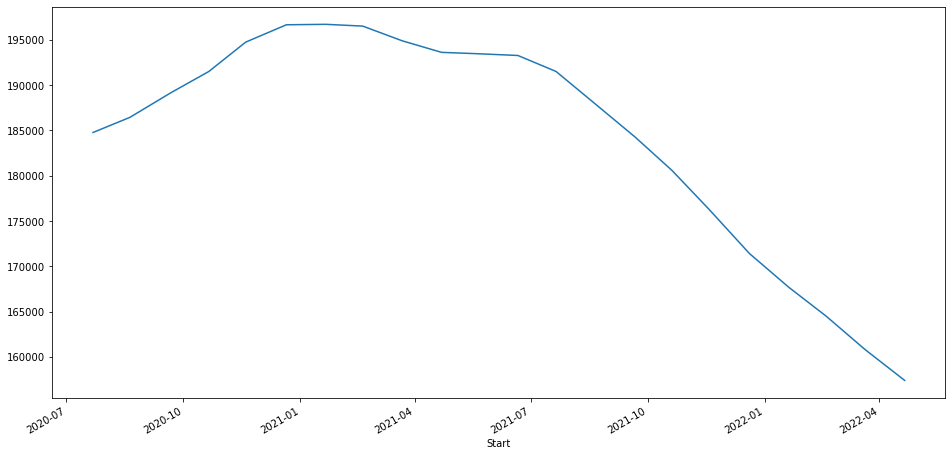

In [15]:
#Plot of trendline adjusted for seasonality
ax = trend.plot(figsize=(16,8));

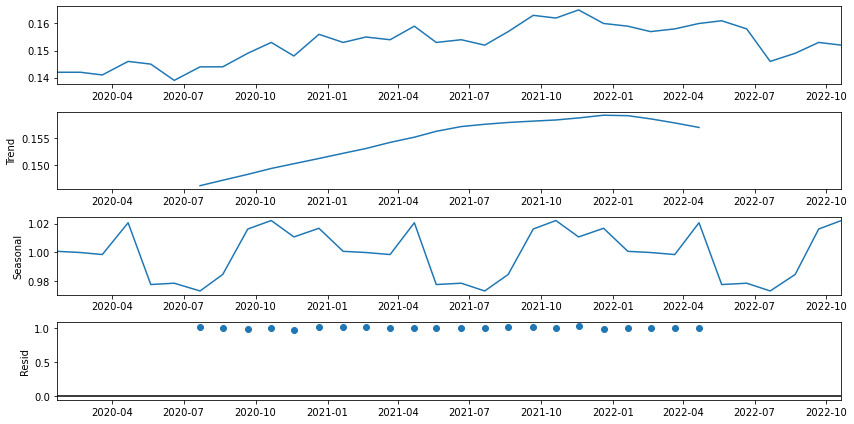

In [19]:
data_orig.set_index('Start', inplace=True)
analysis2 = data_orig[['net_rate']].copy()

decompose_result_mult2 = seasonal_decompose(analysis2, model="multiplicative", period=12)

trend2 = decompose_result_mult2.trend
seasonal2 = decompose_result_mult2.seasonal
residual2 = decompose_result_mult2.resid
plt.rc("figure", figsize=(12,6))
decompose_result_mult2.plot();